# 1) Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual

In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [6]:
df_test = pd.read_csv("D:/assingment/support vector machine/SalaryData_Test(1).csv")

In [7]:
df_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [9]:
df_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
df_test[df_test.duplicated()].shape

(930, 14)

In [11]:
df_test[df_test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [12]:
df_test=df_test.drop_duplicates()

In [13]:
df_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14130 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            14130 non-null  int64 
 1   workclass      14130 non-null  object
 2   education      14130 non-null  object
 3   educationno    14130 non-null  int64 
 4   maritalstatus  14130 non-null  object
 5   occupation     14130 non-null  object
 6   relationship   14130 non-null  object
 7   race           14130 non-null  object
 8   sex            14130 non-null  object
 9   capitalgain    14130 non-null  int64 
 10  capitalloss    14130 non-null  int64 
 11  hoursperweek   14130 non-null  int64 
 12  native         14130 non-null  object
 13  Salary         14130 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [15]:
df_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [16]:
df_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [17]:
df_test["Salary"].value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

In [18]:
pd.crosstab(df_test['occupation'],df_test['Salary'])


Salary,<=50K,>50K
occupation,,
Adm-clerical,1451,252
Armed-Forces,2,3
Craft-repair,1338,391
Exec-managerial,1022,875
Farming-fishing,427,57
Handlers-cleaners,597,51
Machine-op-inspct,801,112
Other-service,1449,64
Priv-house-serv,87,2


In [19]:
pd.crosstab(df_test['workclass'],df_test['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,278,182
Local-gov,721,296
Private,7932,2206
Self-emp-inc,259,306
Self-emp-not-inc,937,342
State-gov,488,176
Without-pay,5,2


In [20]:
pd.crosstab(df_test['workclass'],df_test['occupation'])


occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,
Federal-gov,169,5,29,86,1,13,5,20,0,70,19,3,28,12
Local-gov,135,0,65,115,14,18,11,104,0,343,142,9,20,41
Private,1244,0,1283,1201,211,596,863,1206,89,997,106,1373,400,569
Self-emp-inc,16,0,59,210,30,4,4,15,0,84,0,126,6,11
Self-emp-not-inc,20,0,255,189,217,6,23,101,0,197,1,195,16,59
State-gov,119,0,38,95,9,10,6,66,0,208,58,8,29,18
Without-pay,0,0,0,1,2,1,1,1,0,0,0,1,0,0


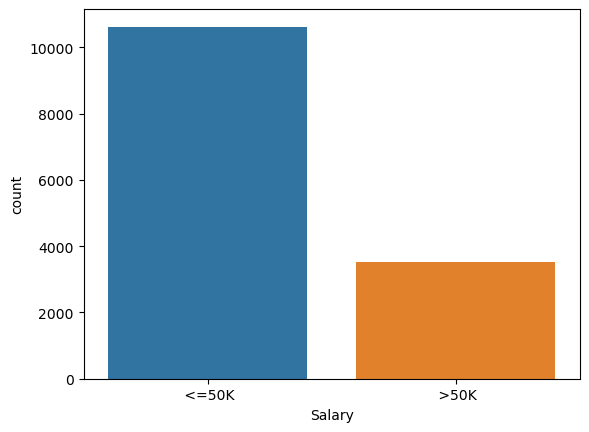

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Salary',data= df_test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
df_test['Salary'].value_counts()

In [22]:
df_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [23]:
categorical=[col for col in df_test.columns if df_test[col].dtypes=="object"]

In [24]:
numerical=[col for col in df_test.columns if df_test[col].dtypes!="object"]

In [25]:
df1_test=df_test[categorical]

In [26]:
df1_test

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
15055,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,United-States,<=50K
15056,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
15057,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
15058,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K


# Preprocessing the data. As, there are categorical variables

In [27]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
for i in df1_test.columns:
        df1_test[i]= LE.fit_transform(df1_test[i])

In [28]:
df1_test

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,2,1,4,6,3,2,1,37,0
1,2,11,2,4,0,4,1,37,0
2,1,7,2,10,0,4,1,37,1
3,2,15,2,6,0,2,1,37,1
4,2,0,4,7,1,4,1,37,0
...,...,...,...,...,...,...,...,...,...
15055,2,9,4,9,3,4,1,37,0
15056,2,9,0,9,1,4,0,37,0
15057,2,9,2,9,0,4,1,37,0
15058,2,9,0,0,3,1,1,37,0


In [29]:
df2_test = df_test[numerical]


In [30]:
df2_test

,age,educationno,capitalgain,capitalloss,hoursperweek
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,34,6,0,0,30
...,...,...,...,...,...
15055,33,13,0,0,40
15056,39,13,0,0,36
15057,38,13,0,0,50
15058,44,13,5455,0,40


In [31]:
##Preprocessing the data. As, there are numerical variables
from sklearn.preprocessing import StandardScaler
SS= StandardScaler()
df2_test=SS.fit_transform(df2_test)

In [32]:
df2_test=pd.DataFrame(df2_test)


In [33]:
df2_test

,0,1,2,3,4
0,-1.054088,-1.199146,-0.150059,-0.226108,-0.087538
1,-0.086038,-0.430644,-0.150059,-0.226108,0.727617
2,-0.830692,0.722109,-0.150059,-0.226108,-0.087538
3,0.360754,-0.046393,0.822747,-0.226108,-0.087538
4,-0.383900,-1.583397,-0.150059,-0.226108,-0.902694
...,...,...,...,...,...
14125,-0.458365,1.106360,-0.150059,-0.226108,-0.087538
14126,-0.011573,1.106360,-0.150059,-0.226108,-0.413600
14127,-0.086038,1.106360,-0.150059,-0.226108,0.727617
14128,0.360754,1.106360,0.540193,-0.226108,-0.087538


In [34]:
numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [35]:
df2_test.columns=['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [36]:
df2_test

,age,educationno,capitalgain,capitalloss,hoursperweek
0,-1.054088,-1.199146,-0.150059,-0.226108,-0.087538
1,-0.086038,-0.430644,-0.150059,-0.226108,0.727617
2,-0.830692,0.722109,-0.150059,-0.226108,-0.087538
3,0.360754,-0.046393,0.822747,-0.226108,-0.087538
4,-0.383900,-1.583397,-0.150059,-0.226108,-0.902694
...,...,...,...,...,...
14125,-0.458365,1.106360,-0.150059,-0.226108,-0.087538
14126,-0.011573,1.106360,-0.150059,-0.226108,-0.413600
14127,-0.086038,1.106360,-0.150059,-0.226108,0.727617
14128,0.360754,1.106360,0.540193,-0.226108,-0.087538


In [37]:
df1_test.reset_index(drop=True,inplace=True)
df2_test.reset_index(drop=True,inplace=True)

In [38]:
df3_test=pd.concat([df2_test,df1_test],axis=1)

In [39]:
df3_test

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,-1.054088,-1.199146,-0.150059,-0.226108,-0.087538,2,1,4,6,3,2,1,37,0
1,-0.086038,-0.430644,-0.150059,-0.226108,0.727617,2,11,2,4,0,4,1,37,0
2,-0.830692,0.722109,-0.150059,-0.226108,-0.087538,1,7,2,10,0,4,1,37,1
3,0.360754,-0.046393,0.822747,-0.226108,-0.087538,2,15,2,6,0,2,1,37,1
4,-0.383900,-1.583397,-0.150059,-0.226108,-0.902694,2,0,4,7,1,4,1,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,-0.458365,1.106360,-0.150059,-0.226108,-0.087538,2,9,4,9,3,4,1,37,0
14126,-0.011573,1.106360,-0.150059,-0.226108,-0.413600,2,9,0,9,1,4,0,37,0
14127,-0.086038,1.106360,-0.150059,-0.226108,0.727617,2,9,2,9,0,4,1,37,0
14128,0.360754,1.106360,0.540193,-0.226108,-0.087538,2,9,0,0,3,1,1,37,0


In [40]:
df_train=pd.read_csv("D:/assingment/support vector machine/SalaryData_Train(1).csv")
df_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [41]:
df_train[df_train.duplicated()].shape
df_train[df_train.duplicated()]
df_train=df_train.drop_duplicates()
df_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [42]:
categorical1=[col for col in df_train.columns if df_train[col].dtypes=="object"]

In [43]:
numerical1=[col for col in df_train.columns if df_train[col].dtypes!="object"]


In [44]:
df1_train=df_train[categorical1]

In [45]:
df1_train

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
30154,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
30155,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
30156,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
30158,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


In [46]:
#Preprocessing the data. As, there are categorical variables
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
for i in df1_train.columns:
        df1_train[i]= LE.fit_transform(df1_train[i])

In [48]:
df1_train

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,5,9,4,0,1,4,1,37,0
1,4,9,2,3,0,4,1,37,0
2,2,11,0,5,1,4,1,37,0
3,2,1,2,5,0,2,1,37,0
4,2,9,2,9,5,2,0,4,0
...,...,...,...,...,...,...,...,...,...
30154,2,12,2,3,0,4,1,37,1
30155,2,15,4,10,1,4,1,37,0
30156,2,7,2,12,5,4,0,37,0
30158,2,11,6,0,4,4,0,37,0


In [44]:
df2_train=df_train[numerical1]


In [45]:
df2_train

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
30154,53,14,0,0,40
30155,22,10,0,0,40
30156,27,12,0,0,38
30158,58,9,0,0,40


In [46]:
##Preprocessing the data. As, there are numerical variables
from sklearn.preprocessing import StandardScaler
SS= StandardScaler()
df2_train=SS.fit_transform(df2_train)

In [47]:
df2_train=pd.DataFrame(df2_train)

In [48]:
df2_train.columns=['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [49]:
df2_train

,age,educationno,capitalgain,capitalloss,hoursperweek
0,-0.003726,1.089919,0.122810,-0.23133,-0.094323
1,0.830329,1.089919,-0.155722,-0.23133,-2.281121
2,-0.079549,-0.436737,-0.155722,-0.23133,-0.094323
3,1.057799,-1.200065,-0.155722,-0.23133,-0.094323
4,-0.837781,1.089919,-0.155722,-0.23133,-0.094323
...,...,...,...,...,...
26898,1.057799,1.471583,-0.155722,-0.23133,-0.094323
26899,-1.292720,-0.055073,-0.155722,-0.23133,-0.094323
26900,-0.913604,0.708255,-0.155722,-0.23133,-0.256308
26901,1.436914,-0.436737,-0.155722,-0.23133,-0.094323


In [50]:
df1_train.reset_index(drop=True,inplace=True)
df2_train.reset_index(drop=True,inplace=True)

In [51]:
df3_train=pd.concat([df2_train,df1_train],axis=1)

In [52]:
df3_train

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,-0.003726,1.089919,0.122810,-0.23133,-0.094323,5,9,4,0,1,4,1,37,0
1,0.830329,1.089919,-0.155722,-0.23133,-2.281121,4,9,2,3,0,4,1,37,0
2,-0.079549,-0.436737,-0.155722,-0.23133,-0.094323,2,11,0,5,1,4,1,37,0
3,1.057799,-1.200065,-0.155722,-0.23133,-0.094323,2,1,2,5,0,2,1,37,0
4,-0.837781,1.089919,-0.155722,-0.23133,-0.094323,2,9,2,9,5,2,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,1.057799,1.471583,-0.155722,-0.23133,-0.094323,2,12,2,3,0,4,1,37,1
26899,-1.292720,-0.055073,-0.155722,-0.23133,-0.094323,2,15,4,10,1,4,1,37,0
26900,-0.913604,0.708255,-0.155722,-0.23133,-0.256308,2,7,2,12,5,4,0,37,0
26901,1.436914,-0.436737,-0.155722,-0.23133,-0.094323,2,11,6,0,4,4,0,37,0


In [53]:
###################### support vector machine ###########################

In [54]:
x_test=df3_test.iloc[:,0:13]
x_train=df3_train.iloc[:,0:13]
y_test=df3_test["Salary"]
y_train=df3_train["Salary"]

In [55]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1.0)

In [56]:
clf.fit(x_train,y_train)

SVC(kernel='linear')

In [57]:
y_pred_test = clf.predict(x_test)
y_pred_train  = clf.predict(x_train)

In [58]:
from sklearn import metrics
print("Training Accuracy :",metrics.accuracy_score(y_train, y_pred_train).round(2))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test).round(2))

Training Accuracy : 0.81
Testing Accuracy: 0.8


In [59]:
############# support vrctor machine or poly #################

In [81]:
from sklearn.svm import SVC
clf = SVC(kernel='poly', degree=2)

In [82]:
clf.fit(x_train, y_train)

SVC(degree=2, kernel='poly')

In [83]:
y_pred_test = clf.predict(x_test)
y_pred_train  = clf.predict(x_train)

In [84]:
from sklearn import metrics
print("Training Accuracy :",metrics.accuracy_score(y_train, y_pred_train).round(2))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test).round(2))

Training Accuracy : 0.8
Testing Accuracy: 0.8


In [64]:
################### support vector machine for rbf ################

In [65]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', gamma=2)

In [66]:
clf.fit(x_train, y_train)

SVC(gamma=2)

In [67]:
y_pred_test = clf.predict(x_test)
y_pred_train  = clf.predict(x_train)

In [68]:
from sklearn import metrics
print("Training Accuracy :",metrics.accuracy_score(y_train, y_pred_train).round(2))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test).round(2))

Training Accuracy : 0.93
Testing Accuracy: 0.8
